In [27]:
%pip install squarify


Note: you may need to restart the kernel to use updated packages.


# ENDUTIH 2023

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import plotly.express as px


In [55]:
# cargamos los datos
usuarios1 = pd.read_csv("../data/conjunto_de_datos_endutih_2023_csv/conjunto_de_datos/tr_endutih_usuarios_anual_2023.csv")
usuarios2 = pd.read_csv("../data/conjunto_de_datos_endutih_2023_csv/conjunto_de_datos/tr_endutih_usuarios2_anual_2023.csv")

/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_35485/3897937464.py:1: DtypeWarning:

Columns (20,28,46,49,60,70,89,103,170,178,189,204,210) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_35485/3897937464.py:2: DtypeWarning:

Columns (40,66) have mixed types. Specify dtype option on import or set low_memory=False.



SECCIÓN V. DISPONIBILIDAD, COSTO Y CALIDAD DE SERVICIOS DE TECNOLOGÍAS DE LA INFORMACIÓN
Y LAS COMUNICACIONES (TIC) EN EL HOGAR

In [56]:
# agregamos estados a los datos
estados = ["Aguascalientes","Baja California","Baja California Sur","Campeche","Chiapas","Chihuahua","Coahuila de Zaragoza","Colima","Ciudad de México","Durango","Guanajuato","Guerrero","Hidalgo","Jalisco","México","Michoacán de Ocampo","Morelos","Nayarit","Nuevo León","Oaxaca","Puebla","Querétaro","Quintana Roo","San Luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala","Veracruz de Ignacio de la Llave","Yucatán","Zacatecas"]

numeros = list(range(1,33))

estados_id = pd.DataFrame({ "NOM_ENTIDAD" : estados, "ID_ENTIDAD" : numeros})



# SECCIÓN VI

In [59]:
usuarios1.columns

Index(['UPM', 'VIV_SEL', 'HOGAR', 'NUM_REN', 'EDAD', 'P6_1', 'P6_2_1',
       'P6_2_2', 'P6_2_3', 'P6_3',
       ...
       'UPM_DIS', 'EST_DIS', 'DOMINIO', 'TLOC', 'ESTRATO', 'PAREN', 'SEXO',
       'NIVEL', 'GRADO', 'ENT'],
      dtype='object', length=229)

In [60]:
usuarios1_con_entidades = usuarios1.merge(estados_id, how = "left", left_on = "ENT", right_on= "ID_ENTIDAD")
usuarios2_con_entidades = usuarios2.merge(estados_id, how = "left", left_on = "ENT", right_on= "ID_ENTIDAD")

Utilizó una computadora, laptop o tablet en los últimos tres meses

In [61]:
utilizo_disp_ultimos_3_meses = usuarios1_con_entidades.groupby("NOM_ENTIDAD")["P6_1"].value_counts().reset_index()
#utilizo_disp_ultimos_3_meses = utilizo_disp_ultimos_3_meses[utilizo_disp_ultimos_3_meses["P6_1"] == 1]


In [62]:
suma_total = utilizo_disp_ultimos_3_meses.groupby("NOM_ENTIDAD").sum("count")
suma_total.drop("P6_1", axis = 1)
utilizo_disp_ultimos_3_meses = utilizo_disp_ultimos_3_meses.merge(suma_total, how = "left", on = "NOM_ENTIDAD")
utilizo_disp_ultimos_3_meses



,NOM_ENTIDAD,P6_1_x,count_x,P6_1_y,count_y
0,Aguascalientes,2,1121,3,1881
1,Aguascalientes,1,760,3,1881
2,Baja California,2,1020,3,1831
3,Baja California,1,811,3,1831
4,Baja California Sur,2,970,3,1760
...,...,...,...,...,...
59,Veracruz de Ignacio de la Llave,1,458,3,1808
60,Yucatán,2,1200,3,1848
61,Yucatán,1,648,3,1848
62,Zacatecas,2,1352,3,1881


In [63]:
utilizo_disp_ultimos_3_meses[utilizo_disp_ultimos_3_meses["P6_1_x"] == 1]

,NOM_ENTIDAD,P6_1_x,count_x,P6_1_y,count_y
1,Aguascalientes,1,760,3,1881
3,Baja California,1,811,3,1831
5,Baja California Sur,1,790,3,1760
7,Campeche,1,620,3,1814
9,Chiapas,1,683,3,1798
11,Chihuahua,1,736,3,1835
12,Ciudad de México,1,1022,3,1854
15,Coahuila de Zaragoza,1,415,3,1875
17,Colima,1,742,3,1851
19,Durango,1,659,3,1847


In [64]:
# Sí utilizó dispositivo
resp1 = utilizo_disp_ultimos_3_meses[utilizo_disp_ultimos_3_meses["P6_1_x"] == 1].reset_index()
# No utilizo dispositivo
resp2 = utilizo_disp_ultimos_3_meses[utilizo_disp_ultimos_3_meses["P6_1_x"] == 2].reset_index()

counts1 = resp1["count_x"] / resp1["count_y"] * 100
counts2 = resp2["count_x"] / resp2["count_y"] * 100

/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_35485/4231249776.py:7: MatplotlibDeprecationWarning:

You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.



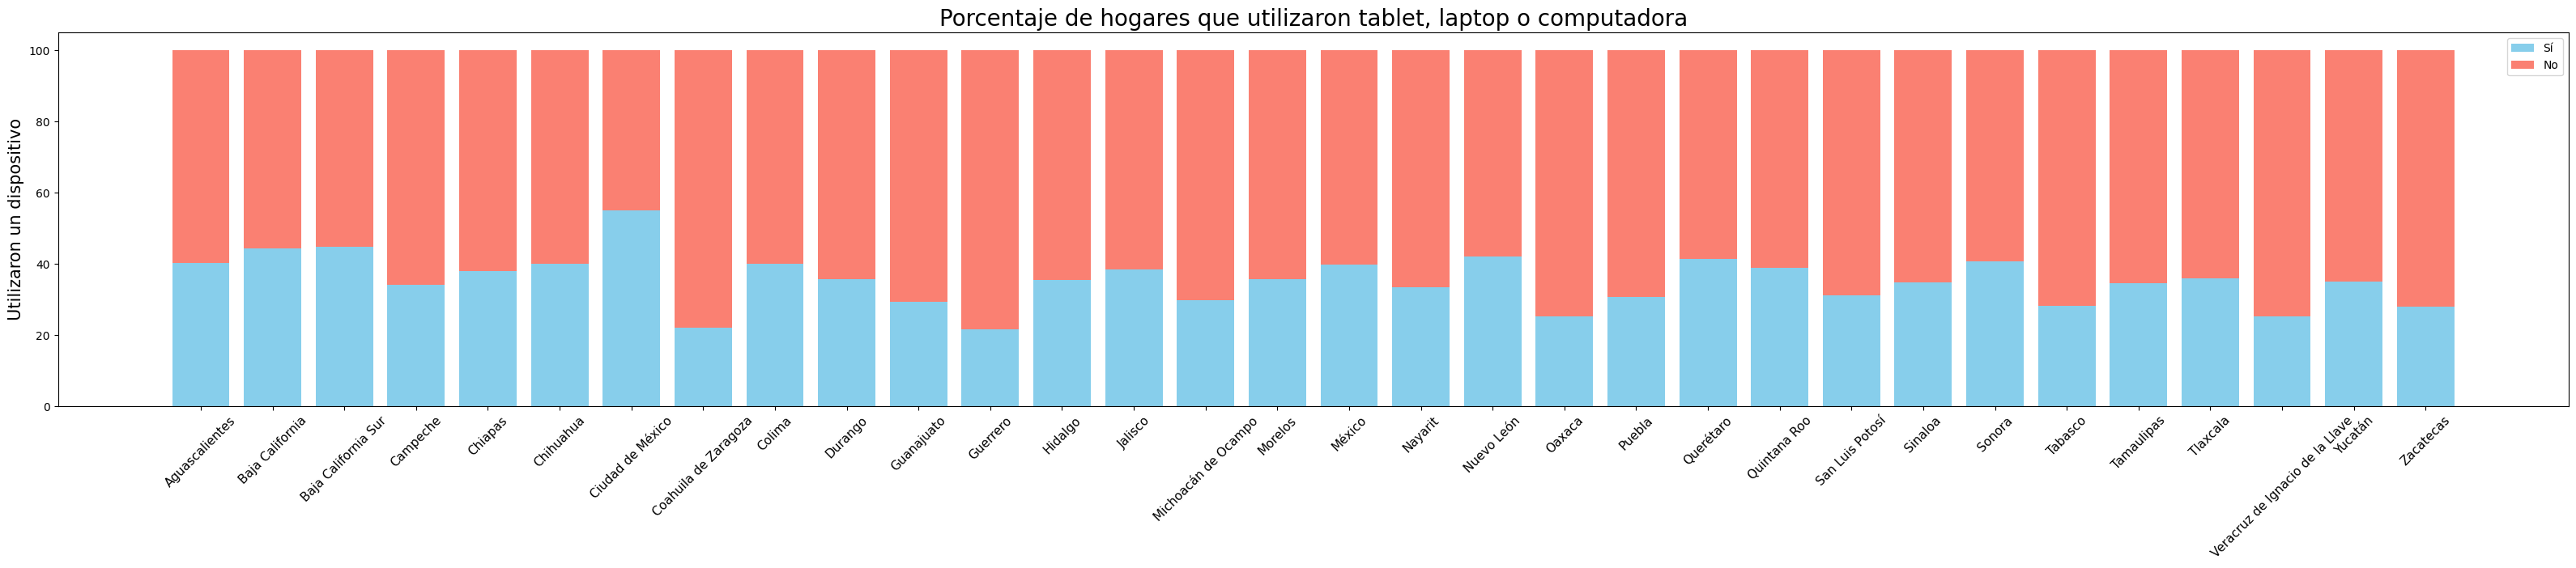

In [65]:
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(resp1["NOM_ENTIDAD"], counts1, label='Value 1', color='skyblue')
ax.bar(resp1["NOM_ENTIDAD"], counts2, bottom=counts1, label='Value 2', color='salmon')
plt.xticks(rotation=45, fontsize = 11)
plt.title('Porcentaje de hogares que utilizaron tablet, laptop o computadora', fontsize = 20)
plt.ylabel('Utilizaron un dispositivo', fontsize = 15)
plt.legend([counts1, counts2], labels = ["Sí", "No"])



# Sección VII

7.4 ¿Cuántas horas al día usa internet?

In [66]:
horas = usuarios1_con_entidades["P7_4"]
promedio_horas = horas.mean()
print("Promedio de horas que usa al día el internet" + str(promedio_horas))
promedio_por_estado = usuarios1_con_entidades.groupby("NOM_ENTIDAD")["P7_4"].mean().reset_index()
print("Promedio por Entidad Federativa")
print(promedio_por_estado)



Promedio de horas que usa al día el internet4.379104029508267
Promedio por Entidad Federativa
                        NOM_ENTIDAD      P7_4
0                    Aguascalientes  4.737958
1                   Baja California  4.405725
2               Baja California Sur  5.142949
3                          Campeche  4.669399
4                           Chiapas  5.385832
5                         Chihuahua  4.365206
6                  Ciudad de México  5.545900
7              Coahuila de Zaragoza  3.459982
8                            Colima  4.947368
9                           Durango  4.359974
10                       Guanajuato  3.965174
11                         Guerrero  3.173302
12                          Hidalgo  3.553206
13                          Jalisco  4.894163
14              Michoacán de Ocampo  3.787083
15                          Morelos  4.313160
16                           México  5.018692
17                          Nayarit  4.618123
18                       Nuevo L

In [67]:
# Data preparation
promedio_por_estado = usuarios1_con_entidades.groupby("NOM_ENTIDAD")["P7_4"].mean().reset_index()
promedio_por_estado = promedio_por_estado.sort_values(by="P7_4", ascending=False)

# Define autumn-inspired color palette
colores_otono = px.colors.sequential.Aggrnyl

# Create the bar chart
fig = px.bar(
    promedio_por_estado,
    x="NOM_ENTIDAD",
    y="P7_4",
    title="Promedio de horas de uso diario de internet por Entidad Federativa",
    color="P7_4",
    color_continuous_scale=colores_otono
)

# Update layout for a cleaner, more readable chart
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Entidad Federativa",
    yaxis_title="Promedio de Horas al Día",
    xaxis_tickangle=45,
    coloraxis_showscale=False,
)

fig.show()


7.21 En los últimos 12 meses, ¿ha realizado compras por internet?

In [68]:
usuarios1_con_entidades.reset_index()
print(usuarios1_con_entidades.columns)

Index(['UPM', 'VIV_SEL', 'HOGAR', 'NUM_REN', 'EDAD', 'P6_1', 'P6_2_1',
       'P6_2_2', 'P6_2_3', 'P6_3',
       ...
       'DOMINIO', 'TLOC', 'ESTRATO', 'PAREN', 'SEXO', 'NIVEL', 'GRADO', 'ENT',
       'NOM_ENTIDAD', 'ID_ENTIDAD'],
      dtype='object', length=231)


/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_35485/1921653311.py:20: MatplotlibDeprecationWarning:

You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.



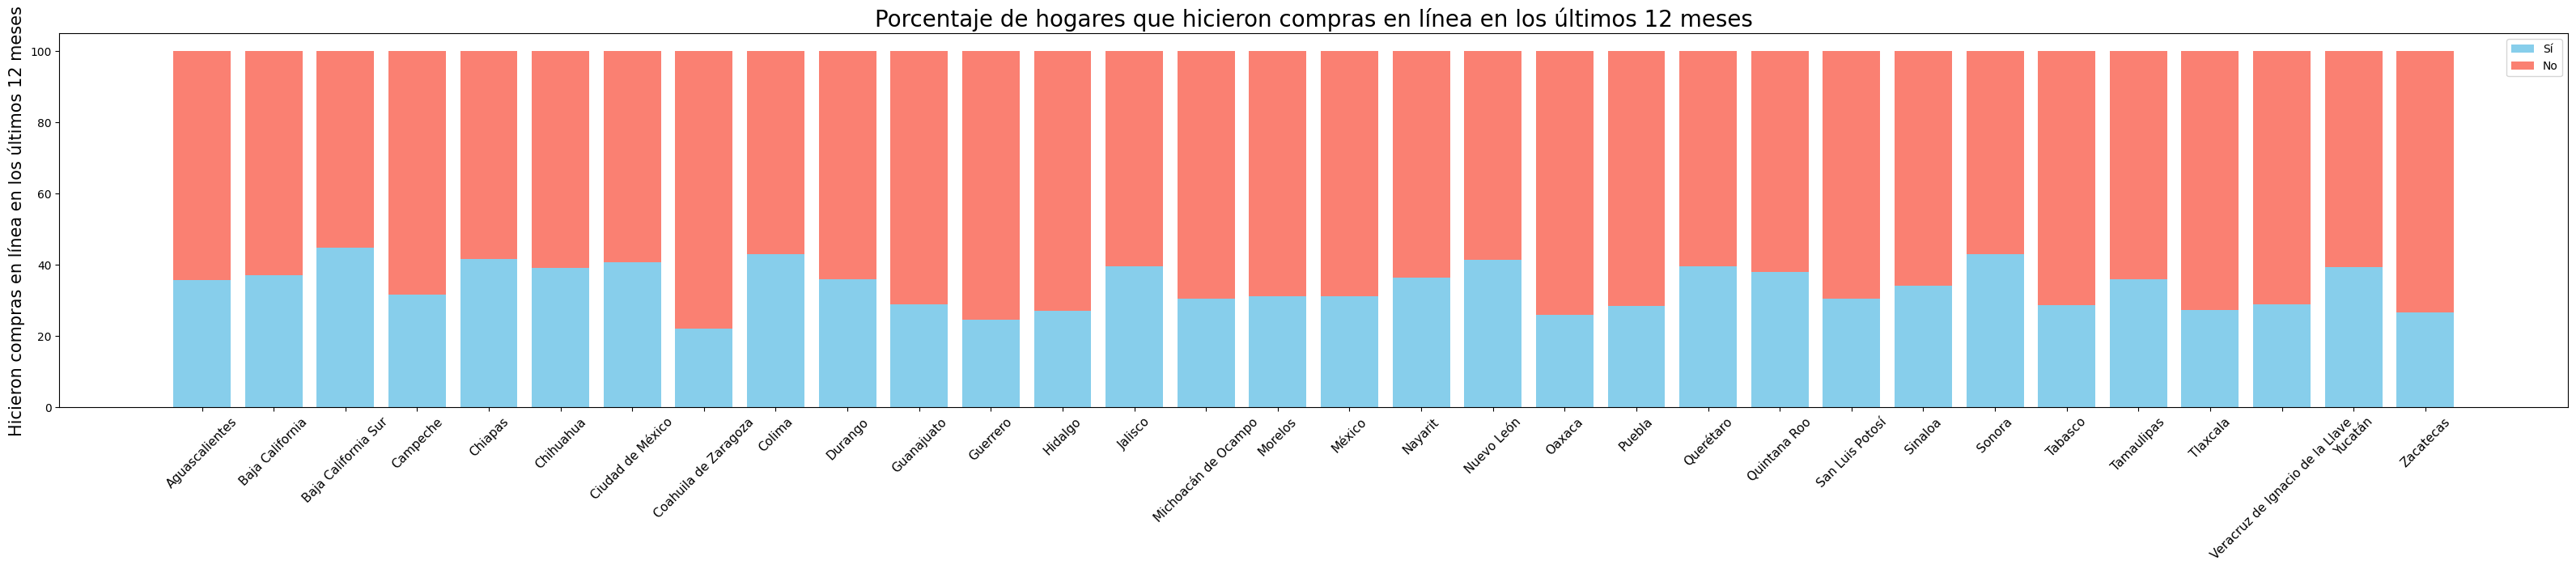

In [69]:
compras_ultimos_12_meses = usuarios1_con_entidades.groupby("NOM_ENTIDAD")["P7_21"].value_counts().reset_index()
suma_total = compras_ultimos_12_meses.groupby("NOM_ENTIDAD").sum("count")
suma_total.drop("P7_21", axis = 1)
compras_ultimos_12_meses = compras_ultimos_12_meses.merge(suma_total, how = "left", on = "NOM_ENTIDAD")

compras_ultimos_12_meses[compras_ultimos_12_meses["P7_21_x"] == 1]
# Respuestas con 1
resp1 = compras_ultimos_12_meses[compras_ultimos_12_meses["P7_21_x"] == 1].reset_index()
# Respuestas con 2
resp2 = compras_ultimos_12_meses[compras_ultimos_12_meses["P7_21_x"] == 2].reset_index()

counts1 = resp1["count_x"] / resp1["count_y"] * 100
counts2 = resp2["count_x"] / resp2["count_y"] * 100
fig, ax = plt.subplots(figsize=(40, 6))
ax.bar(resp1["NOM_ENTIDAD"], counts1, label='Value 1', color='skyblue')
ax.bar(resp1["NOM_ENTIDAD"], counts2, bottom=counts1, label='Value 2', color='salmon')
plt.xticks(rotation=45, fontsize = 11)
plt.title('Porcentaje de hogares que hicieron compras en línea en los últimos 12 meses', fontsize = 20)
plt.ylabel('Hicieron compras en línea en los últimos 12 meses', fontsize = 15)
plt.legend([counts1, counts2], labels = ["Sí", "No"])


Qué red social utiliza

- Facebook --> 01
- Instagram --> 03
- Whatsapp --> 06

In [267]:

facebook = usuarios1_con_entidades[usuarios1_con_entidades["P7_16_1"] == 1]
instagram = usuarios1_con_entidades[usuarios1_con_entidades["P7_16_3"] == 1]
whatsapp = usuarios1_con_entidades[usuarios1_con_entidades["P7_16_1"] == 6]

In [268]:
# Usa Facebook, Instagram o Whatsapp

usa_redes_sociales = usuarios1_con_entidades[(usuarios1_con_entidades["P7_16_1"] == 1) | (usuarios1_con_entidades["P7_16_3"] == 1) | (usuarios1_con_entidades["P7_16_1"] == 6)]
usa_redes_sociales["usa_redes_sociales"] = 1
usa_redes_sociales_cant = usa_redes_sociales.groupby("ID_ENTIDAD").sum()
usa_redes_sociales_cant = usa_redes_sociales_cant["usa_redes_sociales"]

/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_35485/3519571781.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
usa_redes_sociales_cant = pd.DataFrame(usa_redes_sociales_cant)


In [270]:
# Redes sociales Y compras es línea
usa_redes_sociales_y_si_compra_en_linea = usa_redes_sociales[usa_redes_sociales["P7_21"] == 1].groupby("ID_ENTIDAD").count()
usa_redes_sociales_y_no_compra_en_linea = usa_redes_sociales[usa_redes_sociales["P7_21"] == 2].groupby("ID_ENTIDAD").count()


# Porcentaje de quienes usan redes sociales que compran en línea 
si_compra = usa_redes_sociales_y_si_compra_en_linea["usa_redes_sociales"] / usa_redes_sociales_cant * 100
no_compra = usa_redes_sociales_y_no_compra_en_linea["usa_redes_sociales"] / usa_redes_sociales_cant * 100

In [271]:
usa_redes_sociales_y_si_compra_en_linea

,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT,NOM_ENTIDAD,usa_redes_sociales
ID_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
1,504,504,504,504,504,504,373,373,373,131,...,504,504,504,504,504,504,504,504,504,504
2,566,566,566,566,566,566,403,403,403,163,...,566,566,566,566,566,566,566,566,566,566
3,656,656,656,656,656,656,475,475,475,181,...,656,656,656,656,656,656,656,656,656,656
4,441,441,441,441,441,441,314,314,314,127,...,441,441,441,441,441,441,441,441,441,441
5,574,574,574,574,574,574,397,397,397,177,...,574,574,574,574,574,574,574,574,574,574
6,565,565,565,565,565,565,412,412,412,153,...,565,565,565,565,565,565,565,565,565,565
7,241,241,241,241,241,241,171,171,171,70,...,241,241,241,241,241,241,241,241,241,241
8,611,611,611,611,611,611,427,427,427,184,...,611,611,611,611,611,611,611,611,611,611
9,594,594,594,594,594,594,507,507,507,87,...,594,594,594,594,594,594,594,594,594,594


7.22 ¿Por qué no ha realizado compras por internet?

In [251]:
usuarios1_sin_nan = usuarios1_con_entidades.dropna(subset = ["P7_22_1"])
usuarios1_sin_nan["P7_22_10"]

5        2.0
8        2.0
10       2.0
11       2.0
13       2.0
        ... 
58915    2.0
58916    2.0
58917    2.0
58919    2.0
58920    2.0
Name: P7_22_10, Length: 30584, dtype: float64

In [252]:
usuarios1_razones_no_comprar_en_linea = usuarios1_sin_nan[(usuarios1_sin_nan["P7_22_1"] == 1) | (usuarios1_sin_nan["P7_22_2"] == 1) | (usuarios1_sin_nan["P7_22_3"] == 1) | (usuarios1_sin_nan["P7_22_4"] == 1) | (usuarios1_sin_nan["P7_22_5"] == 1)| (usuarios1_sin_nan["P7_22_6"] == 1) | (usuarios1_sin_nan["P7_22_7"] == 1) |(usuarios1_sin_nan["P7_22_8"] == 1) |(usuarios1_sin_nan["P7_22_9"] == 1) |(usuarios1_sin_nan["P7_22_10"] == 1)].reset_index()
total = usuarios1_razones_no_comprar_en_linea.count().reset_index()
total = 30584

porcentaje1 = usuarios1_razones_no_comprar_en_linea[usuarios1_razones_no_comprar_en_linea["P7_22_1"] == 1]
suma = porcentaje1["P7_22_1"].sum()
porcentaje1 = suma / total * 100
porcentaje1

np.float64(34.380721946115614)

In [253]:
preguntas = ["P7_22_1", "P7_22_2", "P7_22_3", "P7_22_4", "P7_22_5", "P7_22_6", "P7_22_7", "P7_22_8", "P7_22_9", "P7_22_10"]
count_ones = usuarios1_razones_no_comprar_en_linea[preguntas].isin([1]).sum()
total = count_ones.sum()


In [254]:
razones = ["Prefiere realizarlo en persona", "No le interesa o no lo necesita", "Por falta de recursos económicos", "Desconfía de la calidad del producto que recibirá", "Desconfía de la seguridad del proceso de compra", "No le permiten realizarlo", "No cuenta con tarjeta de crédto, débito o servicios de banco en línea", "No sabe cómo hacerlo", "No se considera con la edad suficiente para hacerlo", "Otra razón"]
preguntas = ["P7_22_1", "P7_22_2", "P7_22_3", "P7_22_4", "P7_22_5", "P7_22_6", "P7_22_7", "P7_22_8", "P7_22_9", "P7_22_10"]
porcentajes = []
for x in preguntas:
    porcentaje = usuarios1_razones_no_comprar_en_linea[usuarios1_razones_no_comprar_en_linea[x] == 1]
    suma = porcentaje[x].sum()
    porcentaje = suma / total * 100
    porcentajes.append(porcentaje)


In [255]:
# Data preparation
razones = ["Prefiere realizarlo en persona", "No le interesa o no lo necesita", "Por falta de recursos económicos", 
           "Desconfía de la calidad del producto que recibirá", "Desconfía de la seguridad del proceso de compra", 
           "No le permiten realizarlo", "No cuenta con tarjeta de crédito, débito o servicios de banco en línea", 
           "No sabe cómo hacerlo", "No se considera con la edad suficiente para hacerlo", "Otra razón"]

porcentajes = [calculated_value for calculated_value in porcentajes]  # Use your previously calculated list

# Create DataFrame for plotting
data = pd.DataFrame({
    'Razón': razones,
    'Porcentaje': porcentajes
})

data = data.sort_values(by="Porcentaje", ascending=False)

# Define pastel colors
colores_pastel = px.colors.qualitative.Pastel

# Create the horizontal bar chart
fig = px.bar(
    data,
    x='Porcentaje',
    y='Razón',
    title="Razones por las que no realizan compras en línea",
    orientation='h',
    color='Razón',
    color_discrete_sequence=colores_pastel
)

# Update layout to remove legend
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Porcentaje (%)",
    yaxis_title="Razón",
    showlegend=False  # Remove legend
)

fig.show()


In [256]:
# Data preparation
razones = ["Prefiere realizarlo en persona", "No le interesa o no lo necesita", "Por falta de recursos económicos", 
           "Desconfía de la calidad del producto que recibirá", "Desconfía de la seguridad del proceso de compra", 
           "No le permiten realizarlo", "No cuenta con tarjeta de crédito, débito o servicios de banco en línea", 
           "No sabe cómo hacerlo", "No se considera con la edad suficiente para hacerlo", "Otra razón"]

porcentajes = [calculated_value for calculated_value in porcentajes]  # Use your previously calculated list

# Create DataFrame for plotting
data = pd.DataFrame({
    'Razón': razones,
    'Porcentaje': porcentajes
})

data = data.sort_values(by="Porcentaje", ascending=False)

# Define pastel colors
colores_pastel = px.colors.qualitative.Pastel

# Create the horizontal bar chart
fig = px.bar(
    data,
    x='Porcentaje',
    y='Razón',
    title="Razones por las que no realizan compras en línea",
    orientation='h',
    color='Razón',
    color_discrete_sequence=colores_pastel
)

# Update layout to remove legend and add data source
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Porcentaje (%)",
    yaxis_title="Razón",
    showlegend=False,  # Remove legend
    annotations=[
        dict(
            text="Source: INEGI, ENDUTHI 2022",
            x=-0.7,
            y=-0.20,
            xref="paper",
            yref="paper",
            showarrow=False,
            font_size=12
        )
    ]
)

fig.show()


In [265]:
# Data preparation
razones = ["Prefiere realizarlo en persona", "No le interesa o no lo necesita", "Por falta de recursos económicos", 
           "Desconfía de la calidad del producto que recibirá", "Desconfía de la seguridad del proceso de compra", 
           "No le permiten realizarlo", "No cuenta con tarjeta de crédito, débito o servicios de banco en línea", 
           "No sabe cómo hacerlo", "No se considera con la edad suficiente para hacerlo", "Otra razón"]

porcentajes = [calculated_value for calculated_value in porcentajes]  # Use your previously calculated list

# Create DataFrame for plotting
data = pd.DataFrame({
    'Razón': razones,
    'Porcentaje': porcentajes
})

data = data.sort_values(by="Porcentaje", ascending=False)

# Define pastel colors
colores_pastel = px.colors.qualitative.Pastel

# Create the horizontal bar chart
fig = px.bar(
    data,
    x='Porcentaje',
    y='Razón',
    title="Razones por las que no realizan compras en línea",
    orientation='h',
    color='Razón',
    color_discrete_sequence=colores_pastel
)

# Update layout to set black background and adjust font colors
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Porcentaje (%)",
    yaxis_title="Razón",
    showlegend=False,
    plot_bgcolor='black',      # Background of the plot area
    paper_bgcolor='black',     # Background of the entire figure
    font=dict(color="white"),  # Change font color for better contrast
    annotations=[
        dict(
            text="Fuente: Elaboración propia, INEGI, ENDUTIH 2022",
            x=-.65,
            y=-0.25,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12, color="white")  # White font for the source annotation
        )
    ]
)

fig.show()


In [258]:
razones

['Prefiere realizarlo en persona',
 'No le interesa o no lo necesita',
 'Por falta de recursos económicos',
 'Desconfía de la calidad del producto que recibirá',
 'Desconfía de la seguridad del proceso de compra',
 'No le permiten realizarlo',
 'No cuenta con tarjeta de crédito, débito o servicios de banco en línea',
 'No sabe cómo hacerlo',
 'No se considera con la edad suficiente para hacerlo',
 'Otra razón']

In [459]:
porcentajes

[np.float64(29.514132539927584),
 np.float64(19.162432986218317),
 np.float64(4.6200915036348835),
 np.float64(5.827041288910096),
 np.float64(9.655598282201701),
 np.float64(2.3268869116119797),
 np.float64(16.599769837482807),
 np.float64(7.272574171274596),
 np.float64(4.280461447778371),
 np.float64(0.7410110309596654)]

In [485]:
usuarios1_con_entidades["ESTRATO"].value_counts()


ESTRATO
2    30427
3    12387
1    11106
4     5002
Name: count, dtype: int64

In [100]:
# Compran en línea, por estrato
total_estrato1 = usuarios1_con_entidades[usuarios1_con_entidades["ESTRATO"] == 1]
total1 = total_estrato1.shape[0]
estrato1 = usuarios1_con_entidades[(usuarios1_con_entidades["ESTRATO"] == 1) & (usuarios1_con_entidades["P7_21"] == 1)].shape[0]
porcentaje_estrato1 = int(estrato1) / int(total1) * 100


total_estrato2 = usuarios1_con_entidades[usuarios1_con_entidades["ESTRATO"] == 2]
total2 = total_estrato2.shape[0]
estrato2 = usuarios1_con_entidades[(usuarios1_con_entidades["ESTRATO"] == 2) & (usuarios1_con_entidades["P7_21"] == 1)].shape[0]
porcentaje_estrato2 = int(estrato2) / int(total2) * 100


total_estrato3 = usuarios1_con_entidades[usuarios1_con_entidades["ESTRATO"] == 3]
total3 = total_estrato3.shape[0]
estrato3 = usuarios1_con_entidades[(usuarios1_con_entidades["ESTRATO"] == 3) & (usuarios1_con_entidades["P7_21"] == 1)].shape[0]
porcentaje_estrato3 = int(estrato3) / int(total3) * 100

total_estrato4 = usuarios1_con_entidades[usuarios1_con_entidades["ESTRATO"] == 4]
total4 = total_estrato4.shape[0]
estrato4 = usuarios1_con_entidades[(usuarios1_con_entidades["ESTRATO"] == 4) & (usuarios1_con_entidades["P7_21"] == 1)].shape[0]
porcentaje_estrato4 = int(estrato4) / int(total4) * 100

porcentajes_compras_por_estrato = [porcentaje_estrato1, porcentaje_estrato2, porcentaje_estrato3, porcentaje_estrato4]
porcentaje_no_compras_por_estrato = [100 - porcentaje_estrato1, 100- porcentaje_estrato2, 100-porcentaje_estrato3, 100-porcentaje_estrato4]
print(porcentajes_compras_por_estrato)
print(porcentaje_no_compras_por_estrato)



[9.796506392940753, 25.398494757945244, 38.11253733753128, 50.17992802878849]
[90.20349360705924, 74.60150524205476, 61.88746266246872, 49.82007197121151]


In [98]:
tam_estratos = usuarios1_con_entidades["ESTRATO"].value_counts()
tot_tam = tam_estratos.sum()


tam_est1 = tam_estratos[1] / tot_tam * 100
tam_est2 = tam_estratos[2] / tot_tam * 100
tam_est3 = tam_estratos[3] / tot_tam * 100
tam_est4 = tam_estratos[4] / tot_tam * 100

tot_tam = [tam_est1, tam_est2, tam_est3, tam_est4]

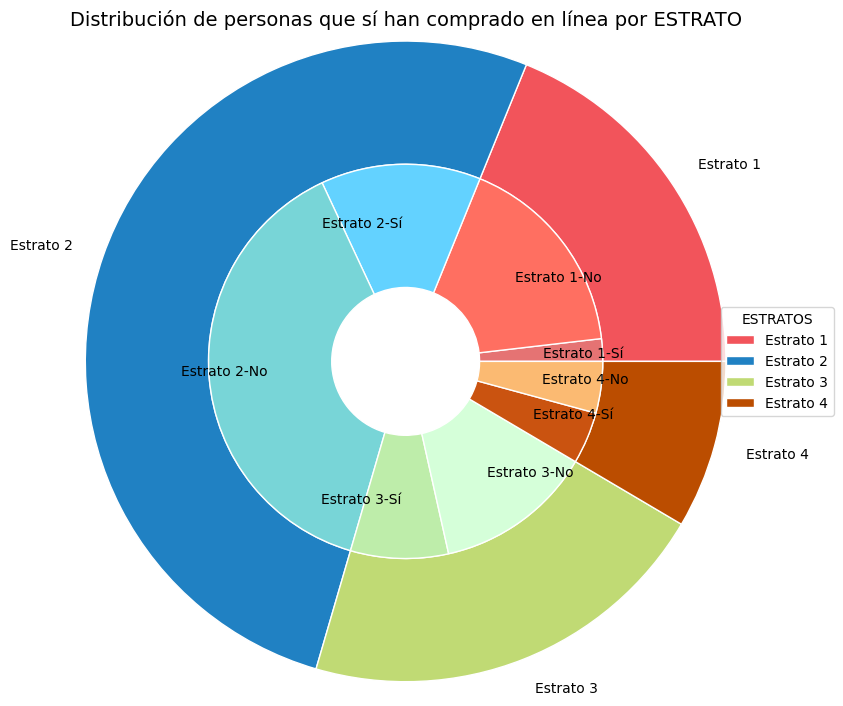

In [214]:
# Outer circle data (distribution of each "estrato")
outer_sizes = tot_tam
outer_labels = ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4"]

# Calculate inner pie data for aligned YES/NO distribution within each "estrato"
inner_sizes = []
inner_labels = []
inner_colors = []

# Define color schemes based on provided palette
outer_colors = ['#F2545B', '#2081C3', '#C0DA74', '#BB4D00']  # Fall-inspired base colors
yes_colors = ['#E57373', '#63D2FF', '#BEEDAA', '#CA5310']     # Slightly lighter versions for YES
no_colors = ['#FF6F61', '#78D5D7', '#D5FFD9', '#FBBA72']    # Softest fall colors for NO
 
# Populate inner sizes so they match the outer distribution, dividing each "estrato" into YES and NO
for i in range(4):
    # Size of buy and no-buy within each "estrato" proportional to outer_sizes
    inner_sizes.append(outer_sizes[i] * (porcentajes_compras_por_estrato[i] / 100))
    inner_sizes.append(outer_sizes[i] * (porcentaje_no_compras_por_estrato[i] / 100))
    inner_labels.extend([f"Estrato {i+1}-Sí", f"Estrato {i+1}-No"])
    inner_colors.extend([yes_colors[i], no_colors[i]])

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot outer pie (distribution of "estratos")
outer_pie = ax.pie(outer_sizes, labels=outer_labels, colors=outer_colors,
                   radius=1.3, labeldistance=1.1,
                   wedgeprops=dict(width=0.5, edgecolor='white'))

# Plot inner pie (buy and no-buy percentages within each "estrato")
inner_pie = ax.pie(inner_sizes, labels=inner_labels,
                   radius=0.8, colors=inner_colors,
                   labeldistance=0.7,
                   wedgeprops=dict(width=0.5, edgecolor='white'))

# Title
plt.title('Distribución de personas que sí han comprado en línea por ESTRATO', fontsize=14, pad=20)

# Add legend
plt.legend(outer_pie[0], outer_labels, 
           title="ESTRATOS",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


# ¿Qué han comprado en línea? P7_24

In [623]:
usuarios1_con_entidades[usuarios1_con_entidades["P7_24_20"] == 1]["P7_24_20"].sum()

np.float64(141.0)

In [207]:
# Qué han comprado en los últimos 12 meses

#diccionario de columnas de dataframe

compras = {}
cantidad = {}
suma_tot = 0

for i in range(1,21):
    compras["P7_24_"+str(i)] = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_"+str(i)] == 1]["P7_24_"+str(i)].sum()
    cantidad["P7_24_"+str(i)] = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_"+str(i)] == 1]["P7_24_"+str(i)].sum()

for key, value in compras.items():
    suma_tot += value

for i in range(1,21):
    compras["P7_24_"+str(i)] = compras["P7_24_"+str(i)] / suma_tot * 100

porcentajes = compras.values()
cantidades = cantidad.values()

etiquetas = ["Libros", "Música y videos", "Computadoras, tablets", "Celulares", "Programas y aplicaciones", "Alimentos y bebidas", "Entradas", "Productos de viaje", "Hospedaje", "Aparatos electrónicos", "Productos de higiene", "Ropa y accesorios", "Artículos para el hogar", "Vehículos o refracciones", "Productos financieros", "Consolas de videojuegos", "Artículos de salud", "Equipo fotográfico", "Servicios de trasporte por plataforma", "Otros"] 

In [212]:
# Create DataFrame from etiquetas and porcentajes
data = pd.DataFrame({
    'Categoría': etiquetas,
    'Porcentaje': porcentajes
})

# Sort the data by percentage for better visual clarity
data = data.sort_values(by="Porcentaje", ascending=False)

# Define an autumn-inspired color palette
colores_otono = px.colors.sequential.Aggrnyl

# Create the bar chart
fig = px.bar(
    data,
    x='Porcentaje',
    y='Categoría',
    orientation='h',
    title="¿Qué han comprado en línea en los últimos 12 meses?",
    color='Porcentaje',
    color_continuous_scale=colores_otono,
)

# Update layout for visual appeal
fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_font_color='darkslategray',
    xaxis_title="Porcentaje (%)",
    yaxis_title="Categoría",
    coloraxis_showscale=False,  # Hide color scale
    height=600
    
)


fig.show()


# Relaciones

In [215]:
si_compran = usuarios1_con_entidades[usuarios1_con_entidades["P7_21"] == 1]
no_compran = usuarios1_con_entidades[usuarios1_con_entidades["P7_21"] == 2]
edad_si_compran = si_compran["EDAD"]
edad_si_compran_por_estado = si_compran.groupby("NOM_ENTIDAD")["EDAD"].mean().reset_index()
prom_edad_si_compran = edad_si_compran.mean()
print("Promedio de edad de las personas que han comprado en línea en los últimos 12 meses" , round(prom_edad_si_compran, 2))


import plotly.express as px

fig = px.histogram(edad_si_compran, x="EDAD")
fig.update_layout(bargap=0.1)

fig.update_layout(
    title="Histograma de edades de personas que sí han comprado en línea en los últimos 12 meses",
    title_font_size=24,
    title_x=0.5,
    title_font_color='darkslategray',
    xaxis_title="Porcentaje (%)",
    yaxis_title="Categoría",
    coloraxis_showscale=False,  # Hide color scale
)


fig.show()


Promedio de edad de las personas que han comprado en línea en los últimos 12 meses 33.67


In [103]:


# Assuming `edad_si_compran` is a Pandas Series with the age data of users who bought online
# Categorize the ages into the specified buckets
edad_si_compran_buckets = pd.cut(
    edad_si_compran,
    bins=[0, 19, 34, 59, float('inf')],
    labels=["0-19", "20-34", "35-59", "60+"]
)

# Convert the Series into a DataFrame for plotting
edad_si_compran_df = pd.DataFrame({'Edad_Bucket': edad_si_compran_buckets})

# Plot histogram based on the age buckets
fig = px.histogram(
    edad_si_compran_df,
    x="Edad_Bucket",
    category_orders={"Edad_Bucket": ["0-19", "20-34", "35-59", "60+"]},
    text_auto=True
)

# Update layout for the histogram
fig.update_layout(
    title="Histograma de edades de personas que sí han comprado en línea en los últimos 12 meses",
    title_font_size=24,
    title_x=0.5,
    title_font_color='darkslategray',
    xaxis_title="Edad (años)",
    yaxis_title="Frecuencia",
    bargap=0.1,
    coloraxis_showscale=False  # Hide color scale
)

fig.show()


np.int64(98)

In [216]:
autoservicio = [6, 11]
esp = [2, 12, 14, 17, 18]
dep = [1,10,13,16]
edades =["0-19", "20-34", "35-59", "60-98"]




In [217]:
# Define age ranges and categories


# Initialize a list to store total counts for each age range across all categories in autoservicio
total_autoservicio_cant = [0] * len(edades)

for i in autoservicio:
    compras_autoservicio = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_" + str(i)] == 1]
    
    # Accumulate counts for each age range
    for idx, rango in enumerate(edades):
        lower_bound, upper_bound = map(int, rango.split("-"))
        
        # Filter rows in the current age range and count them
        en_rango = compras_autoservicio[
            (compras_autoservicio["EDAD"] >= lower_bound) & 
            (compras_autoservicio["EDAD"] <= upper_bound)
        ].shape[0]
        
        total_autoservicio_cant[idx] += en_rango  # Add count to the total for this age range

# Print the total counts by age range
print("Total purchases by age range for autoservicio categories:", total_autoservicio_cant)
auto_grafica  = total_autoservicio_cant

Total purchases by age range for autoservicio categories: [1387, 6292, 3838, 449]


In [218]:


# Initialize a list to store total counts for each age range across all categories in autoservicio
total_autoservicio_cant = [0] * len(edades)

for i in autoservicio:
    compras_autoservicio = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_" + str(i)] == 1]
    
    # Accumulate counts for each age range
    for idx, rango in enumerate(edades):
        lower_bound, upper_bound = map(int, rango.split("-"))
        
        # Filter rows in the current age range and count them
        en_rango = compras_autoservicio[
            (compras_autoservicio["EDAD"] >= lower_bound) & 
            (compras_autoservicio["EDAD"] <= upper_bound)
        ].shape[0]
        
        total_autoservicio_cant[idx] += en_rango  # Add count to the total for this age range

# Print the total counts by age range
print("Total purchases by age range for autoservicio categories:", total_autoservicio_cant)
auto_grafica  = total_autoservicio_cant


Total purchases by age range for autoservicio categories: [1387, 6292, 3838, 449]


In [219]:


# Initialize a list to store total counts for each age range across all categories in autoservicio
total_autoservicio_cant = [0] * len(edades)

for i in esp:
    compras_autoservicio = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_" + str(i)] == 1]
    
    # Accumulate counts for each age range
    for idx, rango in enumerate(edades):
        lower_bound, upper_bound = map(int, rango.split("-"))
        
        # Filter rows in the current age range and count them
        en_rango = compras_autoservicio[
            (compras_autoservicio["EDAD"] >= lower_bound) & 
            (compras_autoservicio["EDAD"] <= upper_bound)
        ].shape[0]
        
        total_autoservicio_cant[idx] += en_rango  # Add count to the total for this age range

# Print the total counts by age range
print("Total purchases by age range for autoservicio categories:", total_autoservicio_cant)

esp_grafica = total_autoservicio_cant

Total purchases by age range for autoservicio categories: [2308, 10187, 7077, 846]


In [220]:
# Define age ranges and categories
autoservicio = [6, 10, 11, 12, 16, 17, 18]
edades = ["0-19", "20-34", "35-59", "60-98"]

# Initialize a list to store total counts for each age range across all categories in autoservicio
total_autoservicio_cant = [0] * len(edades)

for i in dep:
    compras_autoservicio = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_" + str(i)] == 1]
    
    # Accumulate counts for each age range
    for idx, rango in enumerate(edades):
        lower_bound, upper_bound = map(int, rango.split("-"))
        
        # Filter rows in the current age range and count them
        en_rango = compras_autoservicio[
            (compras_autoservicio["EDAD"] >= lower_bound) & 
            (compras_autoservicio["EDAD"] <= upper_bound)
        ].shape[0]
        
        total_autoservicio_cant[idx] += en_rango  # Add count to the total for this age range

# Print the total counts by age range
print("Total purchases by age range for autoservicio categories:", total_autoservicio_cant)

dep_grafica = total_autoservicio_cant
print(dep_grafica)

Total purchases by age range for autoservicio categories: [1422, 7229, 5106, 666]
[1422, 7229, 5106, 666]


Totales

In [221]:
# Define age ranges and categories
cat_totales = [2,3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18]
edades = ["0-19", "20-34", "35-59", "60-98"]

# Initialize a list to store total counts for each age range across all categories in autoservicio
total_autoservicio_cant = [0] * len(edades)

for i in cat_totales:
    compras_todas = usuarios1_con_entidades[usuarios1_con_entidades["P7_24_" + str(i)] == 1]
    
    # Accumulate counts for each age range
    for idx, rango in enumerate(edades):
        lower_bound, upper_bound = map(int, rango.split("-"))
        
        # Filter rows in the current age range and count them
        en_rango = compras_todas[
            (compras_todas["EDAD"] >= lower_bound) & 
            (compras_todas["EDAD"] <= upper_bound)
        ].shape[0]
        
        total_autoservicio_cant[idx] += en_rango  # Add count to the total for this age range

# Print the total counts by age range
print("Total purchases by age range for all categories:", total_autoservicio_cant)

totales_grafica = total_autoservicio_cant
print(totales_grafica)

Total purchases by age range for all categories: [6234, 30474, 20687, 2450]
[6234, 30474, 20687, 2450]


Porcentajes

In [222]:
auto_grupo1 = auto_grafica[0] / totales_grafica[0]
auto_grupo2 = auto_grafica[1] / totales_grafica[1]
auto_grupo3 = auto_grafica[2] / totales_grafica[2]
auto_grupo4 = auto_grafica[3] / totales_grafica[3]

esp_grupo1 = esp_grafica[0] / totales_grafica[0]
esp_grupo2 = esp_grafica[1] / totales_grafica[1]
esp_grupo3 = esp_grafica[2] / totales_grafica[2]
esp_grupo4 = esp_grafica[3] / totales_grafica[3]

dep_grupo1 = dep_grafica[0] / totales_grafica[0]
dep_grupo2 = dep_grafica[1] / totales_grafica[1]
dep_grupo3 = dep_grafica[2] / totales_grafica[2]
dep_grupo4 = dep_grafica[3] / totales_grafica[3]


porcentaje_auto_graf = [auto_grupo1, auto_grupo2, auto_grupo3, auto_grupo4]
porcentaje_esp_graf = [esp_grupo1, esp_grupo2, esp_grupo3, esp_grupo4]
porcentaje_dep_graf = [dep_grupo1, dep_grupo2, dep_grupo3, dep_grupo4]


In [240]:
# Define categories and age groups
auto_dep_esp = ['Autoservicio', 'Especializada', 'Departamental']
edades = ["0-19", "20-34", "35-59", "60+"]


# Create a grouped bar chart
fig = go.Figure()

# Add bars for each age group, using each category as the x-axis
for idx, age_group in enumerate(edades):
    fig.add_trace(go.Bar(
        x=auto_dep_esp,
        y=[porcentaje_auto_graf[idx], porcentaje_esp_graf[idx], porcentaje_dep_graf[idx]],  # Values for current age group across categories
        name=f'Age {age_group}'
    ))

# Update layout to display grouped bars
fig.update_layout(
    title="Distribución del número de compras por categoría y grupo de edad, estandarizada",
    xaxis_title="Categorías",
    yaxis_title="Número de compras",
    barmode='group'
)

fig.show()


In [248]:
import plotly.graph_objects as go

# Define categories and age groups
auto_dep_esp = ['Autoservicio', 'Especializada', 'Departamental']
edades = ["0-19", "20-34", "35-59", "60+"]

# Create a grouped bar chart
fig = go.Figure()

# Add bars for each age group, using each category as the x-axis
for idx, age_group in enumerate(edades):
    fig.add_trace(go.Bar(
        x=auto_dep_esp,
        y=[porcentaje_auto_graf[idx], porcentaje_esp_graf[idx], porcentaje_dep_graf[idx]],  # Values for current age group across categories
        name=f'Age {age_group}'
    ))

# Update layout to display grouped bars and include the source, with a black background
fig.update_layout(
    title="Distribución del número de compras por categoría y grupo de edad, estandarizada",
    xaxis_title="Categorías",
    yaxis_title="Número de compras",
    barmode='group',
    paper_bgcolor="black",   # Sets the entire figure's background to black
    plot_bgcolor="black",    # Sets the plot area background to black
    font=dict(color="white"), # Set font color to white for visibility
    annotations=[
        dict(
            text="Fuente: Elaboración propia con datos de INEGI, ENDUTIH, 2022",
            x=0.5, y=-0.25,  # Positioned below the chart
            xref="paper", yref="paper",
            showarrow=False,
            font=dict(size=12, color="white"),  # White text for visibility on black
            align="center"
        )
    ]
)

fig.show()


In [230]:
# Define categories and age groups
auto_dep_esp = ['Autoservicio', 'Especializada', 'Departamental']
edades = ["0-19", "20-34", "35-59", "60+"]


# Create a grouped bar chart
fig = go.Figure()

# Add bars for each age group, using each category as the x-axis
for idx, age_group in enumerate(edades):
    fig.add_trace(go.Bar(
        x=auto_dep_esp,
        y=[auto_grafica[idx], esp_grafica[idx], dep_grafica[idx]],  # Values for current age group across categories
        name=f'Age {age_group}'
    ))

# Update layout to display grouped bars
fig.update_layout(
    title="Distribution of de compras por categoría y grupo de edad",
    xaxis_title="Categorías",
    yaxis_title="Número de compras",
    barmode='group'  # Group bars side-by-side by age group
)

fig.show()


In [225]:
si_compran

,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT,NOM_ENTIDAD,ID_ENTIDAD
1,100005,2,1,1,42,1,2.0,1.0,2.0,NaN,...,U,1,4,1,1,10,2,1,Aguascalientes,1
2,100005,3,1,1,55,1,2.0,1.0,2.0,NaN,...,U,1,4,1,1,8,5,1,Aguascalientes,1
3,100005,4,1,2,36,2,NaN,NaN,NaN,3.0,...,U,1,4,2,2,8,5,1,Aguascalientes,1
4,100005,4,2,2,24,1,2.0,1.0,2.0,NaN,...,U,1,4,2,1,8,5,1,Aguascalientes,1
6,100016,1,1,2,46,1,1.0,1.0,1.0,NaN,...,U,1,3,3,1,8,5,1,Aguascalientes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58893,3260768,10,1,1,61,1,1.0,2.0,2.0,NaN,...,R,4,2,1,1,4,4,32,Zacatecas,32
58900,3260768,17,1,2,50,1,1.0,1.0,1.0,NaN,...,R,4,2,2,2,6,1,32,Zacatecas,32
58901,3260768,18,1,2,36,1,2.0,1.0,2.0,NaN,...,R,4,2,2,2,10,2,32,Zacatecas,32
58902,3260768,20,1,2,29,2,NaN,NaN,NaN,3.0,...,R,4,2,2,2,6,3,32,Zacatecas,32


In [226]:
#Promedio de edad por estrato que sí compra en línea
si_compran_por_edad_estrato = si_compran[["EDAD", "ESTRATO"]]
promedio_edad_si_compran_por_estrato = si_compran_por_edad_estrato.groupby("ESTRATO")["EDAD"].mean()

promedio_edad_si_compran_por_estrato

ESTRATO
1    28.936581
2    32.304477
3    35.117983
4    37.171713
Name: EDAD, dtype: float64

In [227]:
#Promedio de grado de escolaridad de personas que sí compraron en línea
si_compraron_grado = si_compran["NIVEL"]
promedio_grado = si_compraron_grado.mean()
print(round(promedio_grado))

#Promedio de grado de escolaridad de personas que no compraron en línea
no_compraron_grado = no_compran["NIVEL"]
promedio_grado = no_compraron_grado.mean()
print(round(promedio_grado))

7
4


In [228]:
si_compraron_grado_estrato = si_compran[["NIVEL", "ESTRATO"]]
promedio_grado_estrato = si_compraron_grado_estrato.groupby("ESTRATO").mean("NIVEL")
promedio_grado_estrato

,NIVEL
ESTRATO,
1,5.842831
2,6.142857
3,6.917390
4,7.527092
